<a href="https://colab.research.google.com/github/onubrooks/pandas-tutorial/blob/master/assignment1_USA_flights_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href='https://www.altschoolafrica.com/'> <h2> Python for Data Engineering </h2></a>


# <center> CAPSTONE PROJECT 1 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='altschool.jpeg' width=50%>


In [ ]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

Use this [link](https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/HG7NV7/EIR0RA) to download the dataset and add the path to below to load to pandas. 

Run all the cell to confirm everything is running and then attempt the questions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [ ]:
%%time
# change the path if needed
path = "/content/2008.csv.bz2"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 19.3 s, sys: 534 ms, total: 19.8 s
Wall time: 19.9 s


**Check the number of rows and columns and print column names.**

In [ ]:
print(flights_df.shape)
print(flights_df.columns)

(2389217, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [ ]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,WN,588,16.0,18.0,HOU,LIT,393,0,NaN,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,WN,1343,2.0,5.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,WN,3841,-4.0,-6.0,HOU,MAF,441,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,WN,3,-2.0,8.0,HOU,MCO,848,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,WN,25,16.0,23.0,HOU,MCO,848,0,NaN,16.0,0.0,0.0,0.0,0.0


**Transpose the frame to see all features at once.**

In [ ]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,1343.0,1125.0,2009.0,903.0,1423.0
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,588,1343,3841,3,25
ArrDelay,16.0,2.0,-4.0,-2.0,16.0
DepDelay,18.0,5.0,-6.0,8.0,23.0
Origin,HOU,HOU,HOU,HOU,HOU


**Examine data types of all features and total dataframe size in memory.**

In [ ]:
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [ ]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               2.697202
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.933848
DepDelay              2.697202
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     97.302798
CarrierDelay         75.532444
WeatherDelay         75.532444
NASDelay             75.532444
SecurityDelay        75.532444
LateAircraftDelay    75.532444
dtype: float64

**Get basic statistics of each feature.**

In [ ]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [ ]:
flights_df['UniqueCarrier'].nunique()

20

In [ ]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
dtype: int64

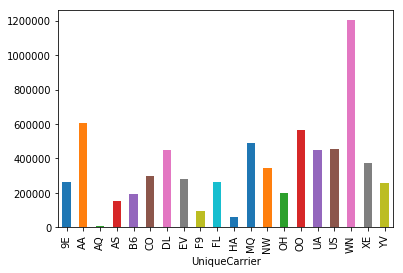

In [ ]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [ ]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [ ]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [ ]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

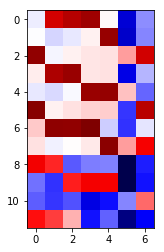

In [ ]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

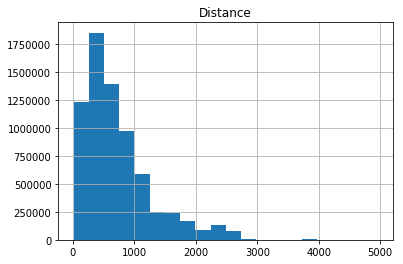

In [ ]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [ ]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [ ]:
num_flights_by_date = flights_df.groupby('Date').size()

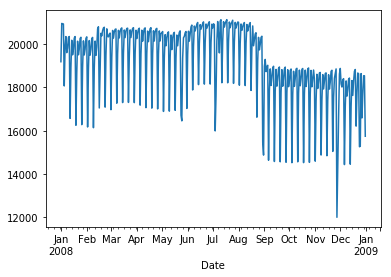

In [ ]:
num_flights_by_date.plot()

**Do you see a weekly pattern above? And below?**

### Now it's your turn. Answer the questions below.

##### The next 20 questions is going to be very tasking so get ready, but don't worry it's easy

That's it! Now go and do 30 push-ups! :). You are now a guru in Data Manipulation and Analysis with Python